## Using data to fill in narratives around waste & misconduct by individual BPD officers 

Looking at frequent overtime users and the overlap with watchlists, salaries, internal complaints, and other abuse

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
df = pd.read_csv('../data/Watchlists and Complaints/discipline.csv', encoding_errors='ignore')
SDA = pd.read_csv('../data/Watchlists and Complaints/Suffolk County DA LEAD database - 9.25.20 - LEAD Entries.csv')
Complaint = pd.read_excel('../data/Watchlists and Complaints/Boston_Police_Active_Officers_Final_List_5.24.22_JBD_05.27.22_Final_.xlsx')
salary = pd.read_csv("../data/Watchlists and Complaints/Highest Salary1.csv")
x = df
#SDA = SDA[SDA["AGENCY"] == "BPD"]
#x.head()
#Complaint.head()
#Complaint.head(20)
#salary.head()
#SDA.head()
salary["name"] = salary["name"].apply(lambda x: x.lower())
SDA["NAME"] = SDA["NAME"].apply(lambda x: x.lower())
Complaint["HCM name"] = Complaint["HCM name"].apply(lambda x: x.lower())
x["Name"] = x["LastName"] + "," + x["FirstName"]
x["Name"] = x["Name"].apply(lambda x: x.lower())

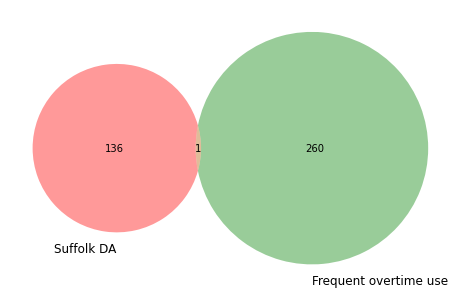

In [22]:
SDA["NAME"] = SDA["NAME"].apply(lambda x: x.split(",")[0] + "," + x.split(",")[1][1:])
Overtime = pd.read_csv("../data/Overtime/frequent overtime users1.csv")
o = Overtime.nlargest(260, columns="overtime_count")
o["Employee"] = o["Employee"].apply(lambda x: x.lower())
#SDA.head()
sum(SDA.NAME.isin(o.Employee).astype(int))
plt.figure(figsize=(8, 8), facecolor='white')
venn2(subsets = (len(SDA), len(o), sum(SDA.NAME.isin(o.Employee).astype(int))), set_labels = ('Suffolk DA', 'Frequent overtime use'))
plt.show()

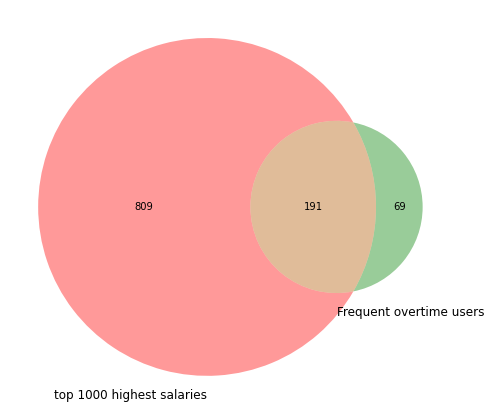

In [23]:
s = sum(salary.name.isin(o.Employee).astype(int))
plt.figure(figsize=(8, 8), facecolor='white')
venn2(subsets = (len(salary) - s, len(o) - s, sum(salary.name.isin(o.Employee).astype(int))), set_labels = ('top 1000 highest salaries', 'Frequent overtime users'))
#plt.show()

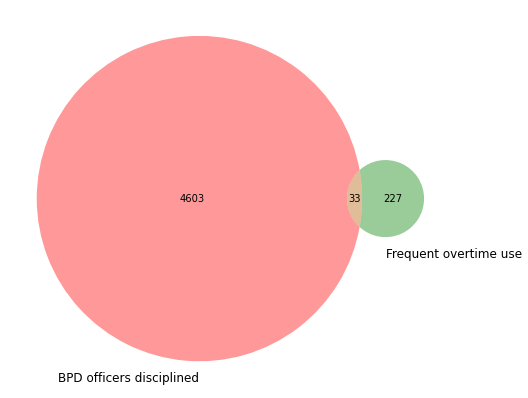

In [24]:
s = sum(x.Name.isin(o.Employee).astype(int))
plt.figure(figsize=(8, 8), facecolor='white')
venn2(subsets = (len(x) - s, len(o) - s, s), set_labels = ('BPD officers disciplined', 'Frequent overtime use'))
plt.show()

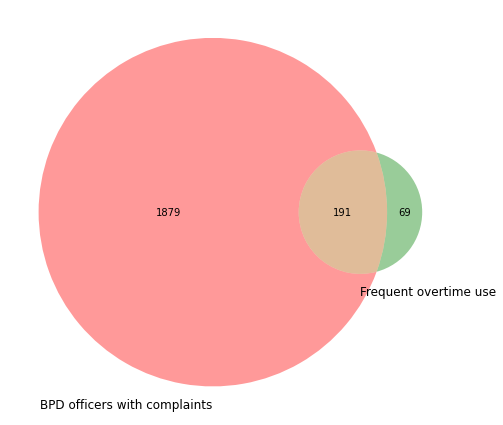

In [25]:
#Complaint.head()
#Complaint.columns
s = sum(Complaint.groupby("Employee_ID_HCM").first().reset_index()["Employee_ID_HCM"].isin(o.Emp_ID).astype(int))
plt.figure(figsize=(8, 8), facecolor='white')
venn2(subsets = (len(Complaint.groupby("Employee_ID_HCM").first().reset_index()) - s, len(o) - s, s), set_labels = ('BPD officers with complaints', 'Frequent overtime use'))
plt.show()

In [26]:
SDA[SDA.NAME.isin(Complaint["HCM name"])]
#SDA.head()
#x[x["Name"] == "hosein,haseeb"]

,NAME,DATE ADDED,AGENCY,STATUS,INFORMATION REGARDING LEAD ENTRY
24,"curtis,christopher",9/25/2020,BPD,Indicted,"Witness intimidation, False Report, CORI Viola..."
54,"herrera-brea,alexis",9/25/2020,BPD,Criminal Complaint - Arraigned,ABDW Family Member. SCDAO investigation/prosec...
62,"hosein,haseeb",9/25/2020,BPD,Sustained,Internal Affairs investigation alleged corrupt...
77,"lynch,joseph",9/25/2020,BPD,Open Investigation,Alleged racial slurs (09/13/2019 noise complai...


In [27]:
o[o["Employee"] == "hosein,haseeb"]

,id,Job No.,Emp_ID,Employee,Rank,Location,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,...,xStreet,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip,years,overtime_count,overtime_avg
57,2903,64894.0,10273.0,"hosein,haseeb",5,KINGSTON\ESSEX,2012-12-06 00:00:00,1800,2300,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1538,192.25
